In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here we use the random number generator to create some artificial 2-dimensional data to scatter.  `rng.normal` generates normally-distributed data.  We're filling a 100x2 array, so we have 100 2-vectors.

In [2]:
rng = np.random.default_rng()
cluster_0 = rng.normal(size=(100,2))

In [3]:
%matplotlib inline

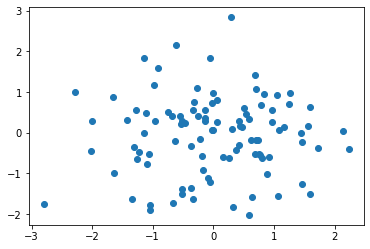

In [4]:
plt.scatter(cluster_0[:,0], cluster_0[:,1])

Now we'll generate three clusters by passing in the `loc` keyword to rng.normal, moving the center of the distributions apart.

In [5]:
# Rerunning this and following cells win generate new random input data
clusters = np.zeros((300, 2))  
clusters[  0:100, :] = rng.normal(loc=(0,0), scale=1.0, size=(100,2))
clusters[100:200, :] = rng.normal(loc=(3,3), scale=1.0, size=(100,2))
clusters[200:300, :] = rng.normal(loc=(3,-3), scale=1.0, size=(100,2))

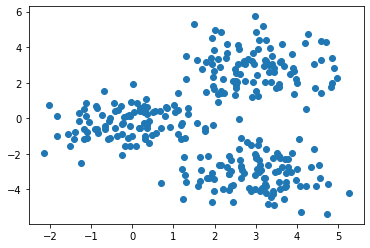

In [6]:
plt.scatter(clusters[:, 0], clusters[:, 1])

Not bad, but we want to see the clusters as different colors.  `plt.scatter` uses the c parameter for an array of colors.

In [7]:
colors = ['red'] * 100 + ['green'] * 100 + ['blue'] * 100

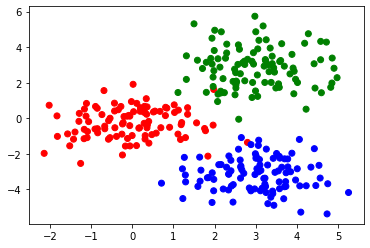

In [8]:
plt.scatter(clusters[:, 0], clusters[:, 1], c=colors)

So the colors above are the "true" clusters.  But if we didn't know that and only had the data points, could we recover the clusters?  This is the task we will try to solve with the K-Means Algorithm.

In [26]:
def normsqr_helper(x): #||x||^2
    y = np.sum(x * x)
    return y

def transpose_helper(x,y): #xTy
    z = np.sum(x * y)
    return z
    
def normsqrmin_helper(x,y): # ||x-y||^2
    z = normsqr_helper(x) - 2*transpose_helper(x,y) + normsqr_helper(y)
    return z
    

def kmeans_cluster(xs, K, steps=100):
    '''return group assignments for k-means clusters as described in Ch. 4

    K = number of clusters, K >= 1
    xs = input vectors: array of arrays, length(xs) >= k

    returns a list of vectors group_assignments
    each vector in the list is the groups assignments at that time step
    group_assignments[i] should be in range(K) for each x in xs'''
    
    
    s = 0
    (T, W) = xs.shape
    representatives = np.zeros((K, W))
    group_assignments = np.random.randint(0, K, T) 
    group_history = np.zeros((steps, T))
    group_history[s] = group_assignments

    # Set initial representatives w/ random idex values from 0 to T
    indecies = np.random.choice(T,K)  
    for i in range(K):
        representatives[i] = xs[indecies[i]]
          
    while (s < steps-1):
            
        #ci.....ck
        for j in range(K):
            
            # xi ......xn
            for i in range(T):
                
                #temporary distance btwm xi and zi
                temp_dist = normsqrmin_helper(xs[i],representatives[j])
                
                #distance using existing group assignment
                set_dist = normsqrmin_helper(xs[i], representatives[group_assignments[i]])

                #if distance is less than that of xi and existing group assignment, set new group assignment
                if temp_dist < set_dist:
                    group_assignments[i] = j
        
        #messy way to get average of all xi in each group assignment
        
        #0...K groups
        for m in range(K):
            
            #get indcies of xi where group assignment in group K
            xi_indicies = (np.where(group_assignments == m))[0]
            
            #initialize empty array to calc  avg
            iter_sum_xi = np.array([0,0])

            #im sorry this is so ugly
            #iter thru indecies and sum vectors
            for n in xi_indicies:
                temp_sum = np.sum([xs[n], iter_sum_xi], axis=0)
                iter_sum_xi = temp_sum
                
            #get avg value of xi in that group
            representatives[m] = np.divide(iter_sum_xi, len(xi_indicies))
         
        s = s + 1
        group_history[s] = group_assignments
        
    # Implement the K-Means Clustering algorithm from chapter 4 here.
    # After each step, append that step's group_assignments to group_history.
    # When the algorithm halts, return group_history and run the following cell to see how the clustering changed with each step 
    return group_history


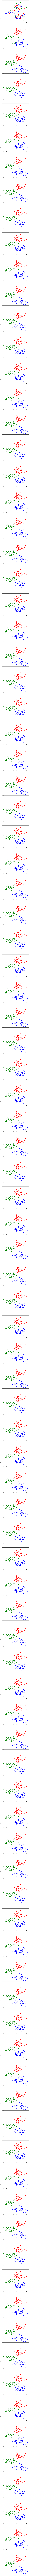

In [27]:
# This codeblock makes a figure for each step in the K-Means iteration.  
# You can rerun this cell multiple times to get different figures from different random starts.
colormap = ['red', 'green', 'blue', 'purple', 'orange', 'pink']
groups = kmeans_cluster(clusters, 3)
N = len(groups)
fig, axes = plt.subplots(nrows=N, figsize=(8, 8*N))
for i in range(N):
    colors = [colormap[int(i)] for i in groups[i]]
    axes[i].scatter(clusters[:, 0], clusters[:, 1], c=colors)